In [ ]:
from numpy import *
import scipy as sp
from pandas import *
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
import pandas.rpy.common as com

We can pass commands to the R session as by putting the R commands in the ro.r() method as strings

In [ ]:
ro.r('x=c()')
ro.r('x[1]=22')
ro.r('x[2]=44')
print(ro.r('x'))

Note that the method of the objects returned by ro.r() are of types that are not python types

In [ ]:
type(ro.r('x'))

# Method 1

In [ ]:
#reading in some data from one of R's built in datasets
ro.r('data(mtcars)')
#Now we will read in the R data.frame into a PANDAS data frame with the following command
df = com.load_data('mtcars')
df.head()

We can manipulate df however we want with PANDAS. Then pass it back to the R instance by first converting df to an R data frame

In [ ]:
rdf = com.convert_to_r_dataframe(df)
type(rdf)

In [ ]:
#and passing it to R
ro.globalenv['mtcars'] = rdf

In [ ]:
print(ro.r('mean(mtcars$mpg)'))

In [ ]:
#So we can perform a regression
ro.r('''fit=lm(mpg ~ wt + cyl, data=mtcars)''')
#and we can look at a summary of the fit with 
print(ro.r('summary(fit)'))

# Install R packages from Python

In [ ]:
from rpy2.robjects.packages import importr
utils = importr('utils')

#For example let's install ggplot2
utils.install_packages('ggplot2')

# Plot with ggplot2 from Python

I call the rmagic extension of IPython notebook. Magic command interface for interactive work with R in ipython.

In [2]:
%load_ext rpy2.ipython

In [5]:
#Loading a df in pandas
import pandas as pd
df = pd.read_csv('../notebooks_upu/data_iata/IATAcodes.csv',sep=';')
df.head()

,code,country,name,lat,long,city,altitude,zone,code2
0,GKA,PG,Goroka,-6.081689,145.391881,Goroka,5282.0,10.0,AYGA
1,MAG,PG,Madang,-5.207083,145.788700,Madang,20.0,10.0,AYMD
2,HGU,PG,Mount Hagen,-5.826789,144.295861,Mount Hagen,5388.0,10.0,AYMH
3,LAE,PG,Nadzab,-6.569828,146.726242,Nadzab,239.0,10.0,AYNZ
4,POM,PG,Port Moresby Jacksons Intl,-9.443383,147.220050,Port Moresby,146.0,10.0,AYPY


The final step is to send the df to R and plot the data using ggplot2. The input to R is defined by using the -i option (HAS TO BE IN THE SAME BLOCK OF CODE!!)

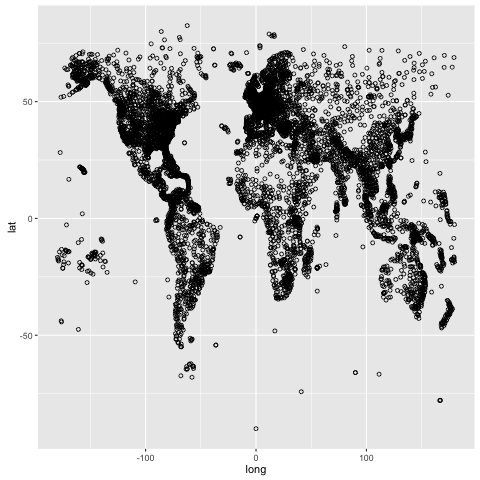

In [11]:
%%R -i df
df <- as.data.frame(df)
library(ggplot2)

p <- ggplot(df, aes(long, lat)) +
     geom_point(shape=1)# Use hollow circles

print(p)

Let's try ggmap too:

In [12]:
#First time, I should install it:
from rpy2.robjects.packages import importr
utils = importr('utils')
utils.install_packages('ggmap')

--- Please select a CRAN mirror for use in this session ---


/Users/iacopo/.pyenv/versions/2.7.10/envs/jupytervenv/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: also installing the dependencies ‘RJSONIO’, ‘maps’, ‘sp’, ‘proto’, ‘RgoogleMaps’, ‘png’, ‘rjson’, ‘mapproj’, ‘jpeg’, ‘geosphere’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/iacopo/.pyenv/versions/2.7.10/envs/jupytervenv/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Do you want to install from sources the package which needs compilation?

  res = super(Function, self).__call__(*new_args, **new_kwargs)



  There is a binary version available but the source version is later:
   binary source needs_compilation
sp  1.1-1  1.2-2              TRUE

y/n: y


/Users/iacopo/.pyenv/versions/2.7.10/envs/jupytervenv/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: trying URL 'https://stat.ethz.ch/CRAN/bin/macosx/mavericks/contrib/3.2/RJSONIO_1.3-0.tgz'

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/iacopo/.pyenv/versions/2.7.10/envs/jupytervenv/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Content type 'application/x-tar'
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/iacopo/.pyenv/versions/2.7.10/envs/jupytervenv/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning:  length 1279678 bytes (1.2 MB)

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/iacopo/.pyenv/versions/2.7.10/envs/jupytervenv/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: =
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/iacopo/.pyenv/versions/2.7.10/envs/jupytervenv/lib/python2.7/site-packa


The downloaded binary packages are in
	/var/folders/rt/3xgwxgv11xv4d4nqm5j7nvj40000gn/T//Rtmpi2lswB/downloaded_packages


/Users/iacopo/.pyenv/versions/2.7.10/envs/jupytervenv/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: trying URL 'https://stat.ethz.ch/CRAN/bin/macosx/mavericks/contrib/3.2/ggmap_2.6.1.tgz'

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/iacopo/.pyenv/versions/2.7.10/envs/jupytervenv/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning:  length 4561559 bytes (4.4 MB)

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/iacopo/.pyenv/versions/2.7.10/envs/jupytervenv/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: downloaded 4.4 MB


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/iacopo/.pyenv/versions/2.7.10/envs/jupytervenv/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: installing the source package ‘sp’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/iacopo/.pyenv/versions/2.7.10/envs/jupytervenv/lib/


The downloaded source packages are in
	‘/private/var/folders/rt/3xgwxgv11xv4d4nqm5j7nvj40000gn/T/Rtmpi2lswB/downloaded_packages’


rpy2.rinterface.NULL

In [ ]:
US = df[df.country=='US']

/Users/iacopo/.pyenv/versions/2.7.10/envs/jupytervenv/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=sanfrancisco&zoom=12&size=640x640&scale=2&maptype=terrain&sensor=false

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/Users/iacopo/.pyenv/versions/2.7.10/envs/jupytervenv/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=sanfrancisco&sensor=false

  res = super(Function, self).__call__(*new_args, **new_kwargs)


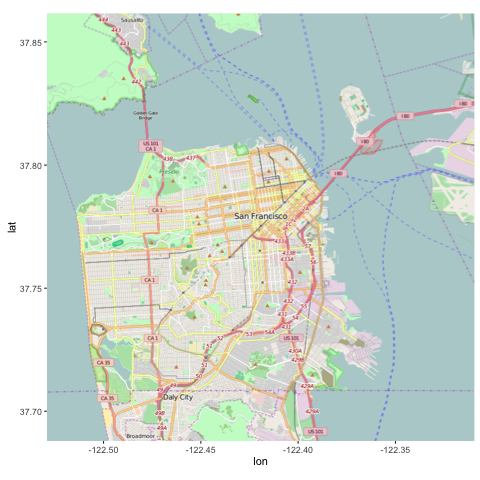

In [22]:
%%R
library(ggplot2)
library(ggmap)
map<-get_map(location="sanfrancisco",zoom=12,source="osm")
#map <-readRDS("../../Data/gadm/USA_adm1.rds", refhook = NULL)
ggmap(map)